<a href="https://colab.research.google.com/github/Kevin2558/Data_Science_Borrador/blob/main/03_Transformaciones/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA (Análisis de Componentes Principales)

Técnica de reducción de dimensionalidad ampliamente utilizada en Ciencia de Datos y ML. Su objetivo principal es transformar un conjunto de variables posiblemente correlacionadas en un nuevo conjunto de variables no correlacionadas, llamadas componentes principales, que capturan la mayor cantidad posible de varianza presente en los datos originales.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Esta vez vamos a generar datos aleatorios para no ir a descargar un dataset.

In [ ]:
np.random.seed(42)
mean = [0,0]
cov = [[3,2],[2,2]]
X = np.random.multivariate_normal(mean, cov, 100)

In [ ]:
X

array([[-0.77984256, -0.72503536],
       [-1.7109707 , -0.05642284],
       [ 0.48959165,  0.18556848],
       [-2.97122622, -1.67515888],
       [ 0.56923681,  0.90023901],
       [ 0.96991616,  0.36603869],
       [ 0.37232934, -1.31659722],
       [ 3.13291389,  1.97374029],
       [ 1.57697817,  1.49525938],
       [ 2.10410746,  0.45639327],
       [-2.37531795, -2.04426174],
       [ 0.46690187, -0.83235256],
       [ 0.87123107,  0.77342021],
       [ 1.78452439,  1.70892989],
       [ 1.12999928,  0.6372315 ],
       [ 0.25813425,  1.75760187],
       [ 0.45373603, -0.53429248],
       [-0.88720856, -1.71831447],
       [ 0.44695249, -1.2973043 ],
       [ 2.15569151,  1.84849172],
       [-1.31299097, -0.88118978],
       [ 0.31738506, -0.0051436 ],
       [ 2.78232697,  1.56765052],
       [ 0.34467994,  1.15718228],
       [ 0.13997584, -1.37180007],
       [-0.38865358, -0.62695041],
       [ 0.89029624,  1.20897763],
       [-2.11511254, -0.86908274],
       [ 1.5387695 ,

Normalizamos a través de Standard Scaler.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ahora aplicaremos PCA en 2 componentes.

In [ ]:
pca = PCA(n_components=2)

Encontrar la cantidad optima de componentes muchas veces se hace a través de prueba y error y en otras veces toca hacerlo dependiendo de lo que quiero utilizar (por ej. en el caso de visualizacion 2 o 3).

In [ ]:
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca

array([[-9.70946359e-01,  6.71307474e-02],
       [-1.02113974e+00, -7.58831849e-01],
       [ 1.54570075e-01,  1.36103364e-01],
       [-2.55314908e+00, -4.12674767e-01],
       [ 6.06646010e-01, -2.41029518e-01],
       [ 4.85250413e-01,  2.57390027e-01],
       [-7.72056430e-01,  9.52390523e-01],
       [ 2.43558125e+00,  3.42357345e-01],
       [ 1.42596037e+00, -1.12097797e-01],
       [ 1.07128347e+00,  7.38587620e-01],
       [-2.48691461e+00,  8.18176618e-02],
       [-4.46635256e-01,  7.15958478e-01],
       [ 6.75156678e-01, -2.53751382e-02],
       [ 1.64756435e+00, -1.38408718e-01],
       [ 7.17894528e-01,  1.75378007e-01],
       [ 9.57663225e-01, -8.84782349e-01],
       [-2.79914857e-01,  5.36849535e-01],
       [-1.59769462e+00,  5.92851708e-01],
       [-7.25755198e-01,  9.76306821e-01],
       [ 1.90315590e+00, -4.47461888e-02],
       [-1.31237292e+00, -9.31149597e-02],
       [-3.70883220e-02,  1.65721943e-01],
       [ 2.03505048e+00,  4.12999236e-01],
       [ 6.

Notemos que cada valor está representado en estas variables nuevas, las componentes.

In [ ]:
components = pca.components_

In [ ]:
components

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([0.87851892, 0.12148108])

Esto nos quiere decir que la primera variable representa el 87% de los datos originales y la otra variable un 12% de los datos originales,

Procedamos a graficar los datos normalizados y a dibujar los vectores de las componentes principales.

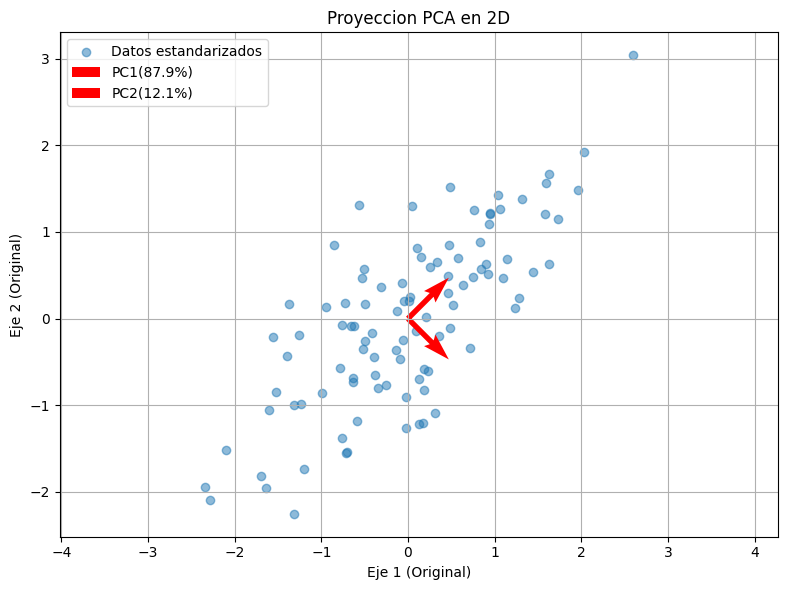

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.5, label='Datos estandarizados')
origin = np.mean(X_scaled, axis=0)

for i in range(2):
    plt.quiver(*origin, components[i,0],components[i,1],
               angles='xy',scale_units='xy',scale=1.5,color='r',
               label=f'PC{i+1}({explained_variance[i]*100:.1f}%)')

plt.title('Proyeccion PCA en 2D')
plt.xlabel('Eje 1 (Original)')
plt.ylabel('Eje 2 (Original)')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.tight_layout()